In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedGroupKFold, train_test_split, GridSearchCV, StratifiedKFold

C:\Users\HP\AppData\Local\Temp\ipykernel_16820\2172601243.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
train_path = 'C:/Users/Hp/Downloads/datasets/titanic/train.csv'
test_path = 'C:/Users/Hp/Downloads/datasets/titanic/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()  

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [12]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1


In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
train_df.groupby(['Family_size'], as_index=False)['Survived'].mean()


,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [15]:
family_map = {1 : 'Alone', 2: 'Small', 3:'Small', 4:'Small', 5:'Medium', 6:'Medium', 7:'Large', 8:'Large', 11:'Large'}
train_df['Family_size_group'] = train_df['Family_size'].map(family_map)
test_df['Family_size_group'] = train_df['Family_size'].map(family_map)


In [16]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,Small
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,Small
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Alone


In [17]:
train_df.groupby(['Family_size_group'], as_index=False )['Survived'].mean()

,Family_size_group,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [18]:
train_df.groupby(['Embarked'], as_index=False )['Survived'].mean()


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


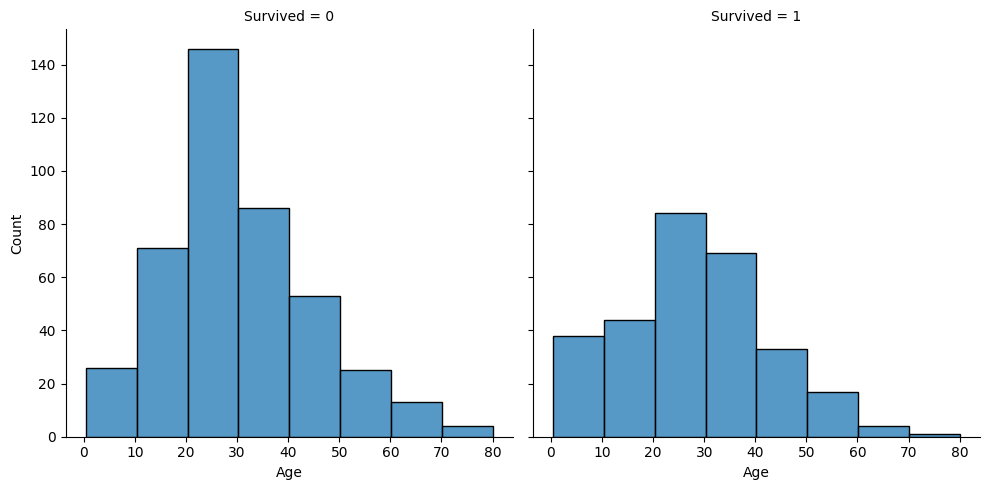

In [19]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10)

In [20]:
train_df['Age_cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_cut'] = pd.qcut(train_df['Age'], 8)


In [21]:
train_df['Age_cut']

0      (20.125, 24.0]
1      (32.312, 38.0]
2        (24.0, 28.0]
3      (32.312, 38.0]
4      (32.312, 38.0]
            ...      
886      (24.0, 28.0]
887    (16.0, 20.125]
888               NaN
889      (24.0, 28.0]
890    (28.0, 32.312]
Name: Age_cut, Length: 891, dtype: category
Categories (8, interval[float64, right]): [(0.419, 16.0] < (16.0, 20.125] < (20.125, 24.0] < (24.0, 28.0] < (28.0, 32.312] < (32.312, 38.0] < (38.0, 47.0] < (47.0, 80.0]]

In [22]:
train_df.groupby(['Age_cut'], as_index=False )['Survived'].mean()


C:\Users\HP\AppData\Local\Temp\ipykernel_16820\313159500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_cut'], as_index=False )['Survived'].mean()


,Age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [23]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df.Age > 80, 'Age']


#for test_df
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df.Age > 80, 'Age']


Series([], Name: Age, dtype: float64)

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_group,Age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


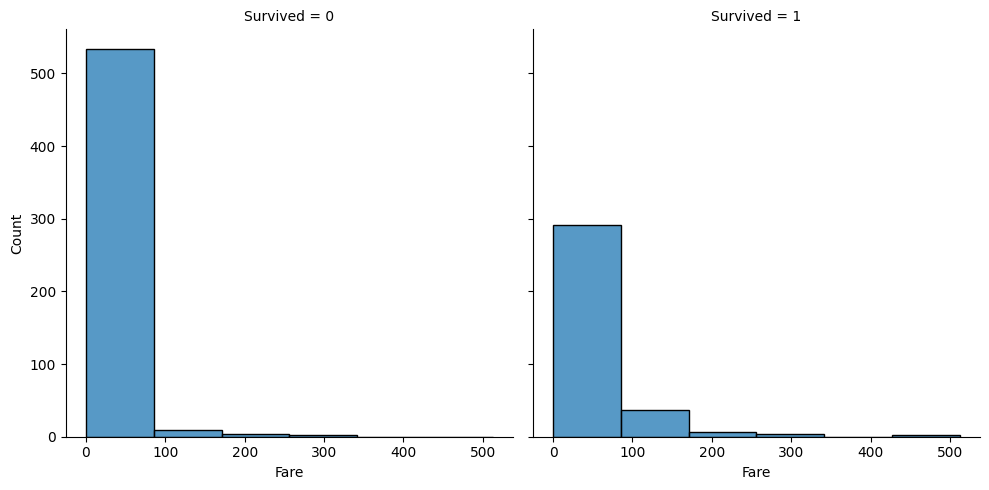

In [25]:
sns.displot(train_df, x = 'Fare', col='Survived', binwidth=80)

In [26]:
train_df['Fare_cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_cut'] = pd.qcut(train_df['Fare'], 6)

In [27]:
train_df.groupby(['Fare_cut'], as_index=False)['Survived'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_16820\3412529244.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_cut'], as_index=False)['Survived'].mean()


,Fare_cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [28]:
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.663), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.663) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df.Fare > 512.329, 'Fare']


# for test_df
test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.663), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.663) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df.Fare > 512.329, 'Fare']


343    512.3292
Name: Fare, dtype: float64

In [29]:
train_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_group,Age_cut,Fare_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,1.0,NaN,Q,1,Alone,NaN,"(7.775, 8.662]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,7.0,0,0,17463,4.0,E46,S,1,Alone,"(47.0, 80.0]","(26.0, 52.369]"


In [30]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [31]:
train_df['Title'] = train_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x:x.strip())
test_df['Title'] = train_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x:x.strip())

In [32]:
train_df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [33]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [34]:
# military - Capt, col, Major
# noble - Johnkeer , the Countess, Don, Lady , Sir
# unmarried Female - Mlle, Ms. Mme

train_df['Title'] = train_df['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military', 
    'Major' : 'Military',
    'Jonkheer' : 'Noble',
    'the Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mlle' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble',
})

test_df['Title'] = test_df['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military', 
    'Major' : 'Military',
    'Jonkheer' : 'Noble',
    'the Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mlle' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble',
})

In [35]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])


,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [36]:
train_df['Name_length'] = train_df['Name'].apply(lambda x:len(x))
test_df['Name_length'] = test_df['Name'].apply(lambda x : len(x))

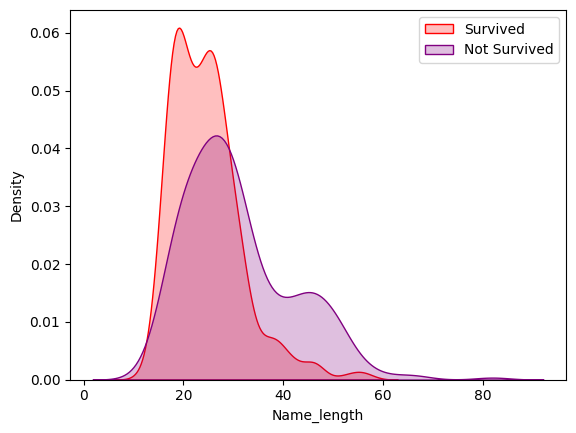

In [37]:
sns.kdeplot(train_df['Name_length'][(train_df['Survived'] == 0) &(train_df['Name_length'].notnull())], color='Red', fill=True)
sns.kdeplot(train_df['Name_length'][(train_df['Survived'] == 1) &(train_df['Name_length'].notnull())], color='Purple', fill=True)
plt.legend(['Survived', 'Not Survived'])
plt.show()

In [38]:
train_df['Name_lengthGB'] = pd.qcut(train_df['Name_length'], 8)
test_df['Name_lengthGB'] = pd.qcut(train_df['Name_length'], 8)

In [39]:
train_df.groupby(['Name_lengthGB'], as_index=False)['Survived'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_16820\2517454713.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_lengthGB'], as_index=False)['Survived'].mean()


,Name_lengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [40]:
train_df.loc[train_df['Name_length'] <= 18.0, 'Name_size'] = 0
train_df.loc[(train_df['Name_length'] > 20.0) & (train_df['Name_length'] <= 20.0), 'Name_size'] = 1
train_df.loc[(train_df['Name_length'] > 23.0) & (train_df['Name_length'] <= 23.0), 'Name_size'] = 2
train_df.loc[(train_df['Name_length'] > 25.0) & (train_df['Name_length'] <= 25.0), 'Name_size'] = 3
train_df.loc[(train_df['Name_length'] > 27.25) & (train_df['Name_length'] <= 27.25), 'Name_size'] = 4
train_df.loc[(train_df['Name_length'] > 30.0) & (train_df['Name_length'] <= 30.0), 'Name_size'] = 6
train_df.loc[(train_df['Name_length'] > 38.0) & (train_df['Name_length'] <= 82), 'Name_size'] = 7
train_df.loc[train_df.Fare > 82, 'Name_length']


# for test_df
test_df.loc[test_df['Name_length'] <= 18.0, 'Name_length'] = 0
test_df.loc[(test_df['Name_length'] > 20.0) & (test_df['Name_length'] <= 20.0), 'Name_size'] = 1
test_df.loc[(test_df['Name_length'] > 23.0) & (test_df['Name_length'] <= 23.0), 'Name_size'] = 2
test_df.loc[(test_df['Name_length'] > 25.0) & (test_df['Name_length'] <= 25.0), 'Name_size'] = 3
test_df.loc[(test_df['Name_length'] > 27.25) & (test_df['Name_length'] <= 27.25), 'Name_size'] = 4
test_df.loc[(test_df['Name_length'] > 30.0) & (test_df['Name_length'] <= 30.0), 'Name_size'] = 6
test_df.loc[(test_df['Name_length'] > 38.0) & (test_df['Name_length'] <= 82), 'Name_size'] = 7
test_df.loc[test_df.Name_length > 82, 'Name_size']


Series([], Name: Name_size, dtype: float64)

In [41]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_group,Age_cut,Fare_cut,Title,Name_length,Name_lengthGB,Name_size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,1.0,NaN,Q,1,Alone,NaN,"(7.775, 8.662]",Mr,16,"(11.999, 18.0]",0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,7.0,0,0,17463,4.0,E46,S,1,Alone,"(47.0, 80.0]","(26.0, 52.369]",Mr,23,"(20.0, 23.0]",NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,3.0,NaN,S,5,Medium,"(0.419, 16.0]","(14.454, 26.0]",Master,30,"(27.25, 30.0]",NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3.0,0,2,347742,2.0,NaN,S,3,Small,"(24.0, 28.0]","(8.662, 14.454]",Mrs,49,"(38.0, 82.0]",7.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.0,1,0,237736,4.0,NaN,C,2,Small,"(0.419, 16.0]","(26.0, 52.369]",Mrs,35,"(30.0, 38.0]",NaN


In [42]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [43]:
# ex : 
#  name = "Toheed 1234"
# name.split() return ['Toheed', '1234']
# name.split()[-1] return last item of list i.e. '1234'

train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x:pd.Series({'Ticket' : x.split()[-1]}))
test_df['TicketNumber'] = train_df['Ticket'].apply(lambda x:pd.Series({'Ticket' : x.split()[-1]}))


In [44]:
train_df['TicketNumber']

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: TicketNumber, Length: 891, dtype: object

In [45]:
train_df.groupby(train_df['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [46]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [47]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_size,Family_size_group,Age_cut,Fare_cut,Title,Name_length,Name_lengthGB,Name_size,TicketNumber,TicketNumberCounts
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",NaN,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",NaN,3101282,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",NaN,373450,1


In [49]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [50]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [51]:
train_df['Ticketlocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

test_df['Ticketlocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [52]:
train_df['Ticketlocation'].value_counts()

Ticketlocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [53]:
train_df['Ticketlocation'] = train_df['Ticketlocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',  
})

test_df['Ticketlocation'] = test_df['Ticketlocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',  
})

In [54]:
train_df.groupby(['Ticketlocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,Ticketlocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [55]:
train_df['Ticketlocation'].value_counts()

Ticketlocation
Blank         665
PC             60
CA             41
A/5            21
SOTON/OQ       15
STON/O         12
SC/Paris       11
W/C            10
STON/O2.        6
A/4             6
F.C.C.          5
C               5
S.O.C.          5
SC/AH           3
S.O./P.P.       3
PP              3
P/PP            2
WE/P            2
SOTON/O2        2
S.W./PP         1
F.C.            1
A/S             1
SC              1
A4.             1
SCO/W           1
SW/PP           1
Fa              1
S.O.P.          1
W.E.P.          1
SO/C            1
S.P.            1
S.C./A.4.       1
C.A./SOTON      1
Name: count, dtype: int64

In [56]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = train_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])


In [57]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [58]:
train_df['Cabin_assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1 )
test_df['Cabin_assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1 )


In [59]:
train_df.groupby(['Cabin_assigned'], as_index=False)['Survived'].agg(['count', 'mean'])


,Cabin_assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [60]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_cut,Fare_cut,Title,Name_length,Name_lengthGB,Name_size,TicketNumber,TicketNumberCounts,Ticketlocation,Cabin_assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",NaN,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",NaN,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",NaN,373450,1,Blank,0


In [61]:
train_df.shape

(891, 24)

In [62]:
test_df.shape

(418, 23)

In [63]:
train_df['Age'].fillna(train_df['Age'].mean() )
test_df['Age'].fillna(test_df['Age'].mean())

test_df['Fare'].fillna(train_df['Fare'].mean())
# test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)


0      1.0
1      0.0
2      2.0
3      1.0
4      2.0
      ... 
413    1.0
414    5.0
415    0.0
416    1.0
417    3.0
Name: Fare, Length: 418, dtype: float64

In [64]:
ode_cols = ['Family_size_group']
ohe_cols = ['Sex', 'Embarked']

In [65]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [66]:
y = train_df['Survived']
X = train_df.drop(['Survived'],  axis=1)
X_test = test_df.drop(['Age_cut', "Fare_cut"], axis=1)

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y, random_state=21)

In [68]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [69]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])


In [70]:
# for Age
X_train['Age'].fillna(0, inplace=True)
X_train['Age'].isna().sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_16820\3595764775.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(0, inplace=True)


0

In [71]:
X_train['Age'].isna().sum()

0

In [72]:
from sklearn.compose import ColumnTransformer

In [73]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_assigned', 'Name_size', 'Age', 'Fare', 'TicketNumberCounts'])
    ],
    remainder='drop',
    n_jobs=-1)

In [74]:
rfc = RandomForestClassifier()

In [75]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [76]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [78]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                  ['Pclass', 'Cabin_assigned',
                                                   'Name_size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [79]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
0.8089825667290457


In [80]:
dtc = DecisionTreeClassifier()

In [82]:
param_grid = {
    'min_samples_split' : [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini', 'entropy'],
}

In [83]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [84]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_group']),
                                                 ('ohe_pipeline',
                                                  Pipeline(ste...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_assigned',
                                                   'Name_size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [85]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.8061558160149709


In [87]:
Y_pred_rfc = pipefinalrfc.predict(X_test)
Y_pred_dtc = pipefinaldtc.predict(X_test)

In [88]:
Y_pred_rfc

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
Y_pred_dtc.shape

(418,)

In [92]:
submission = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : Y_pred_rfc
})

submission = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : Y_pred_dtc
})

In [ ]:
submission.to_csv('submission_titanic1.csv', index=False)